### K-Means clustering on the Iris dataset


∙ Initialize K-Means clustering on the Iris dataset with 3 clusters.

∙ Obtain initial centroids and membership matrices.

∙Update centroids and memberships iteratively.

∙ Visualize each iteration's clustering evolution.

∙ Display final centroids and memberships.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Set up K-Means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='random', n_init=1, max_iter=1, random_state=42)

# Function to plot the data and centroids
def plot_clusters(X, y_kmeans, centroids, title, iteration=None):
    plt.figure(figsize=(10, 6))
    
    # Scatter plot for each cluster
    for i in range(n_clusters):
        plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=50, label=f'Cluster {i + 1}')
    
    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
    
    if iteration is not None:
        plt.title(f'{title} at iteration {iteration}')
    else:
        plt.title(title)
        
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.legend()
    plt.show()

# Function to create membership matrix
def create_membership_matrix(y_kmeans, n_clusters):
    n_samples = len(y_kmeans)
    membership_matrix = np.zeros((n_samples, n_clusters))
    for idx, cluster in enumerate(y_kmeans):
        membership_matrix[idx, cluster] = 1
    return membership_matrix

# Initialize centroids 
kmeans.fit(X)
initial_centroids = kmeans.cluster_centers_
all_centroids = [initial_centroids]
membership_matrices = []

# Perform K-Means clustering for the specified number of iterations
for i in range(1, 11):  # assuming we want to track 10 iterations
    kmeans = KMeans(n_clusters=n_clusters, init=initial_centroids, n_init=1, max_iter=1, random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    all_centroids.append(kmeans.cluster_centers_)
    membership_matrix = create_membership_matrix(y_kmeans, n_clusters)
    membership_matrices.append(membership_matrix)
    initial_centroids = kmeans.cluster_centers_


### Plot centroids and membership matrix

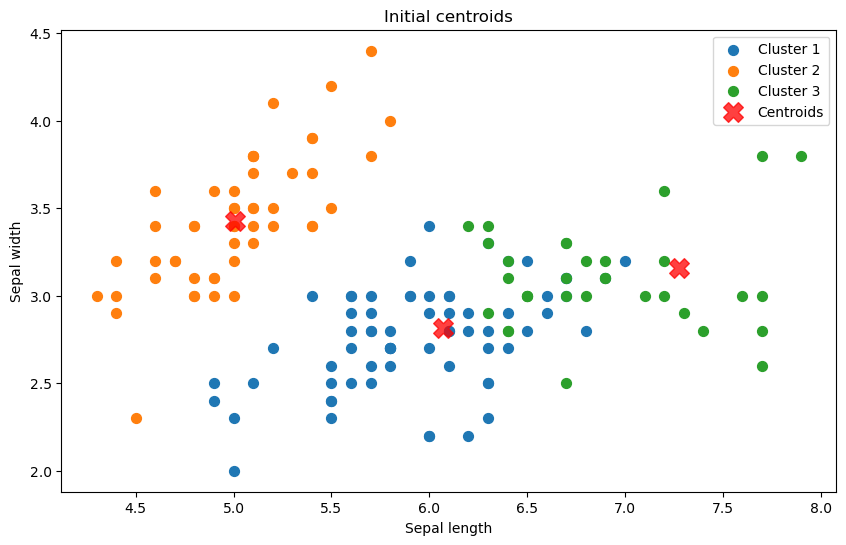

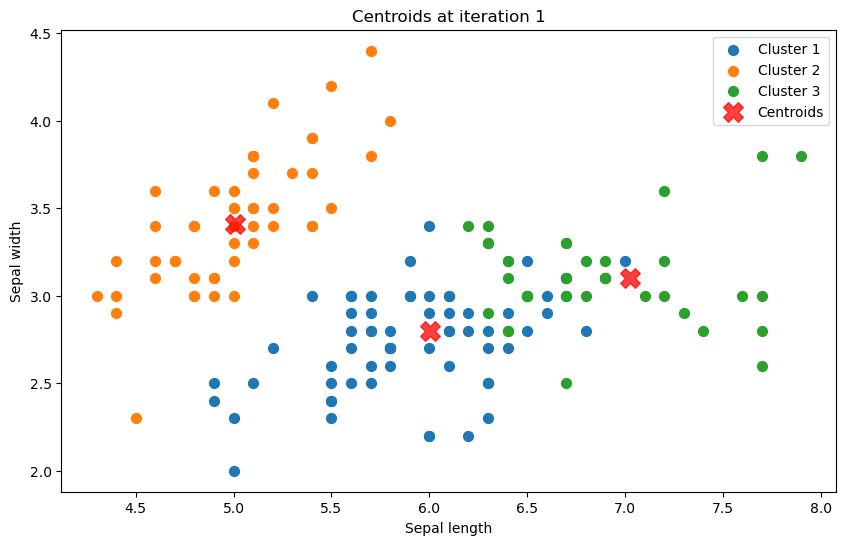

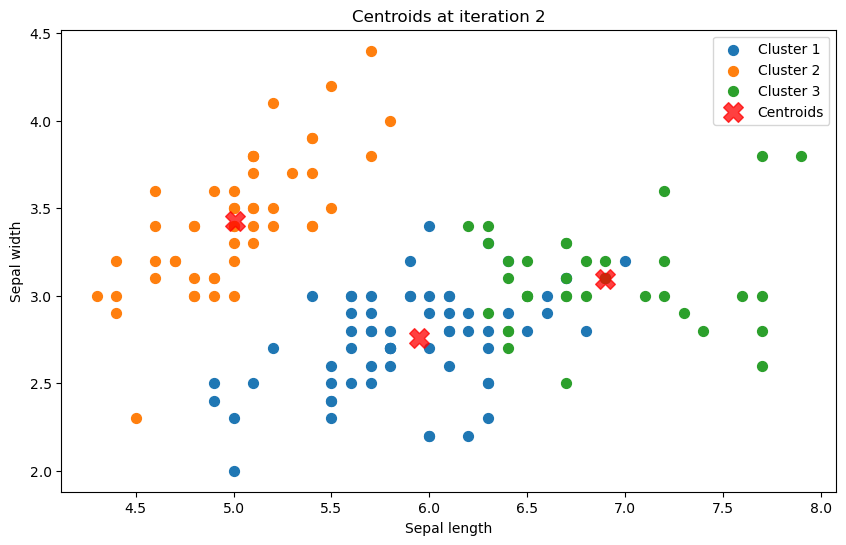

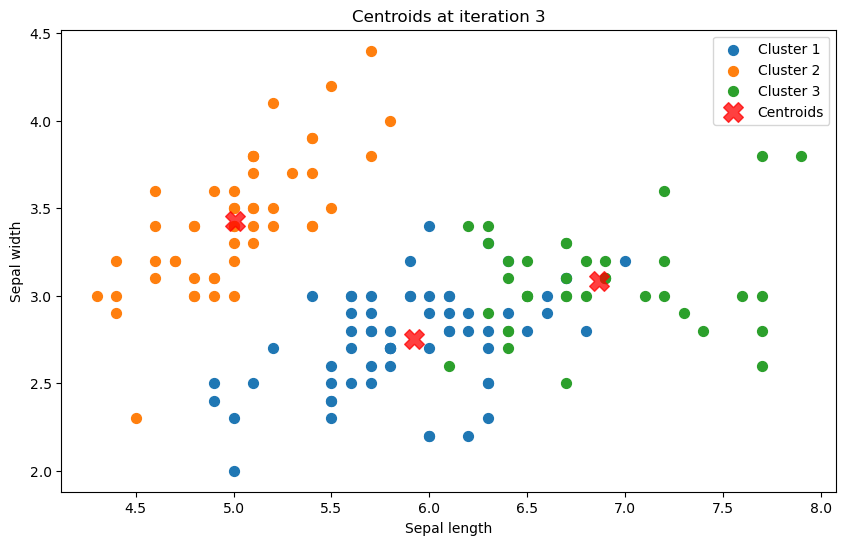

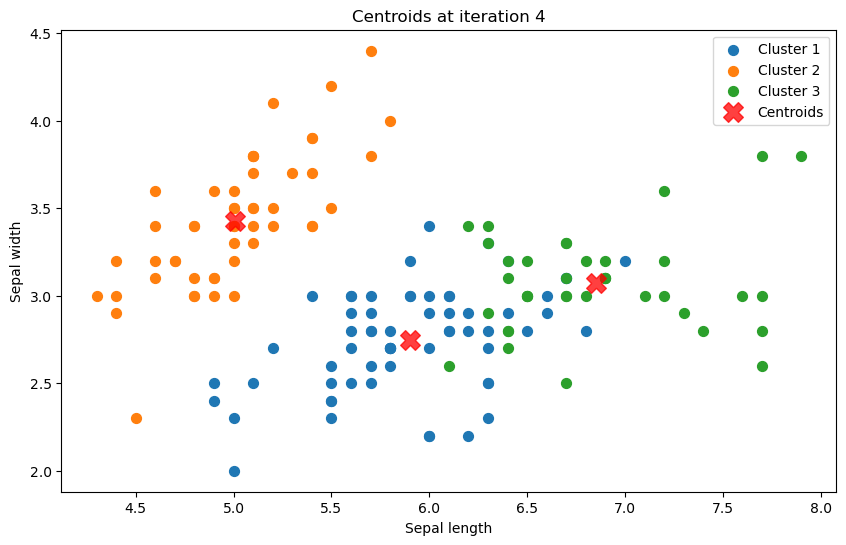

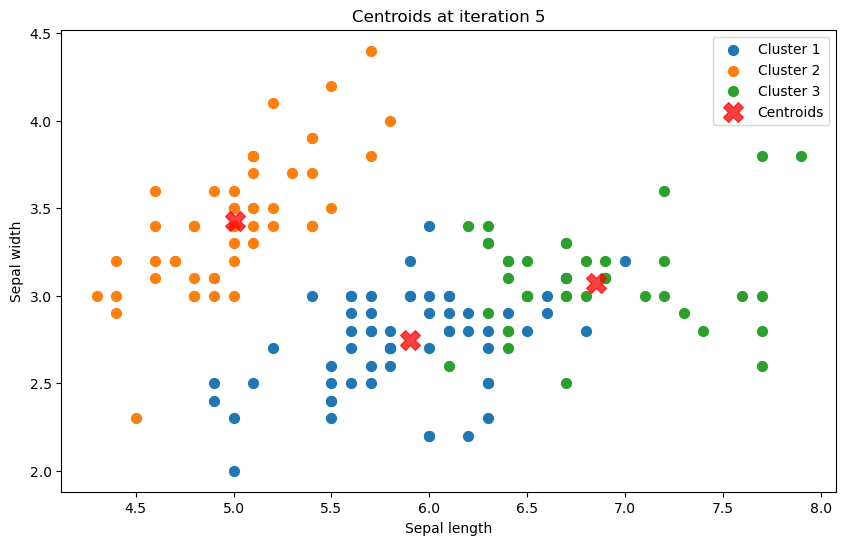

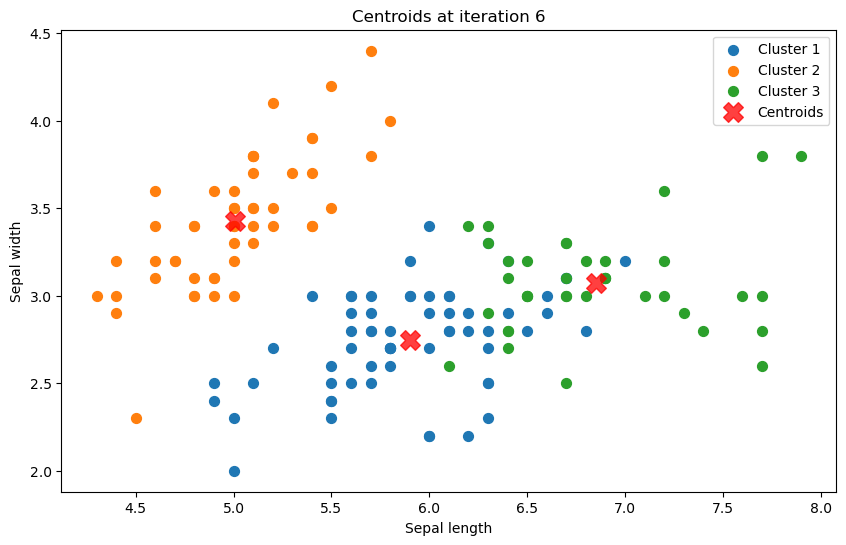

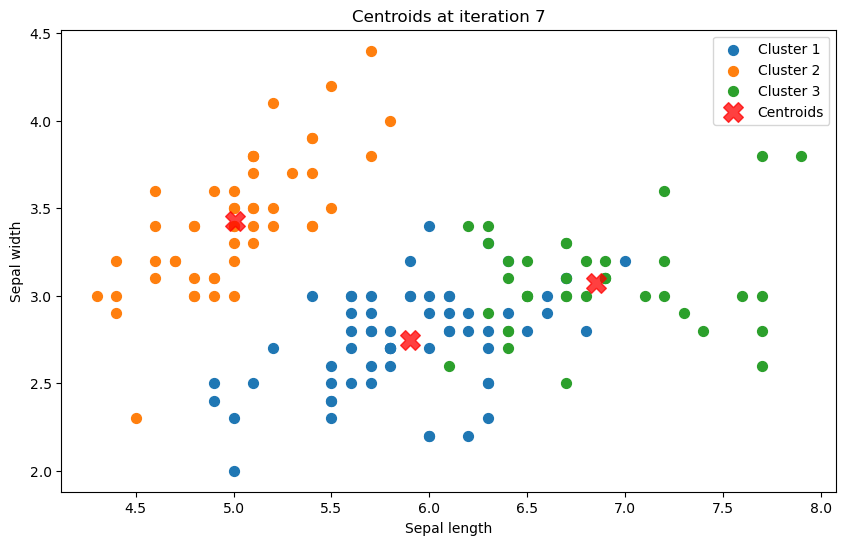

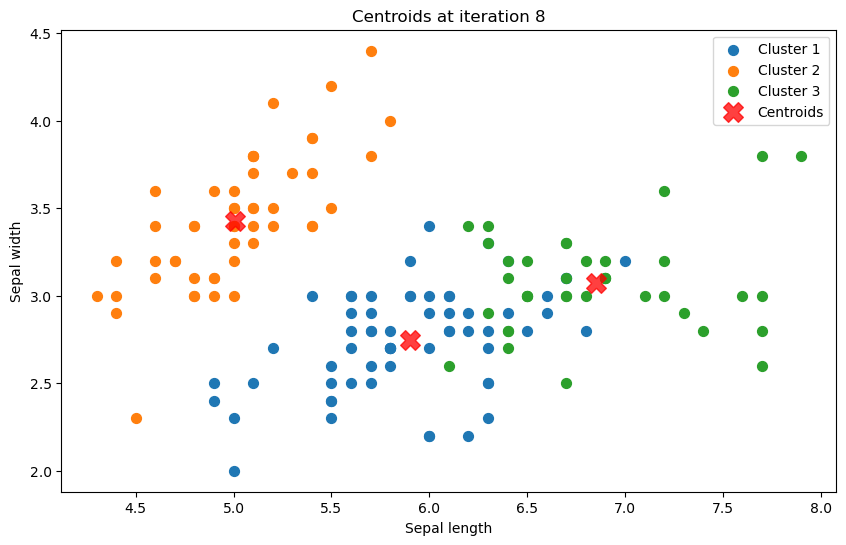

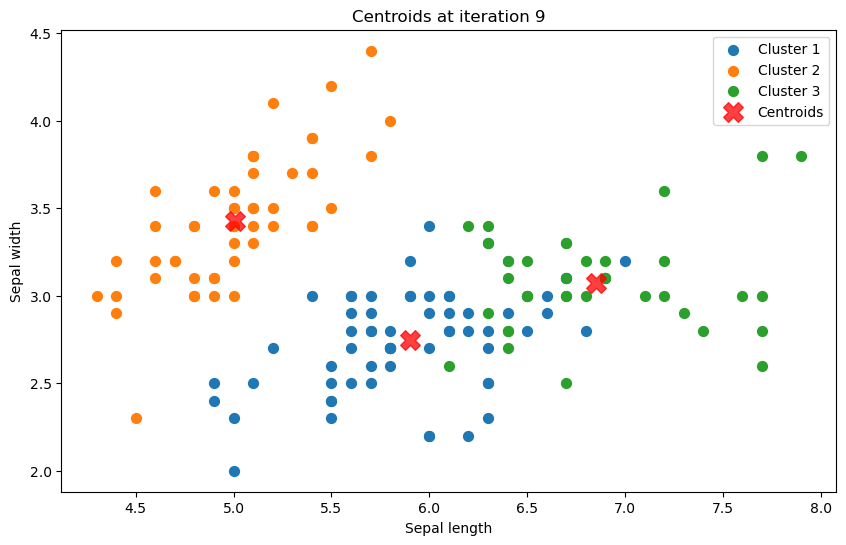

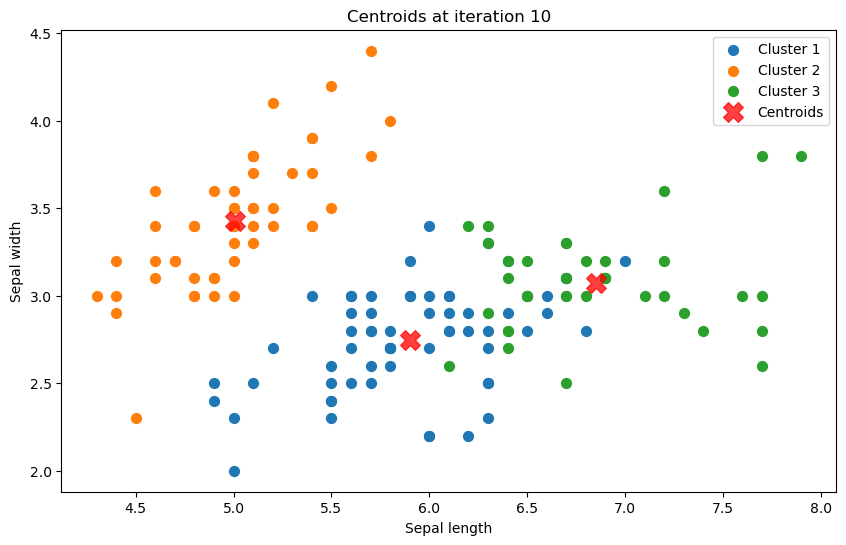

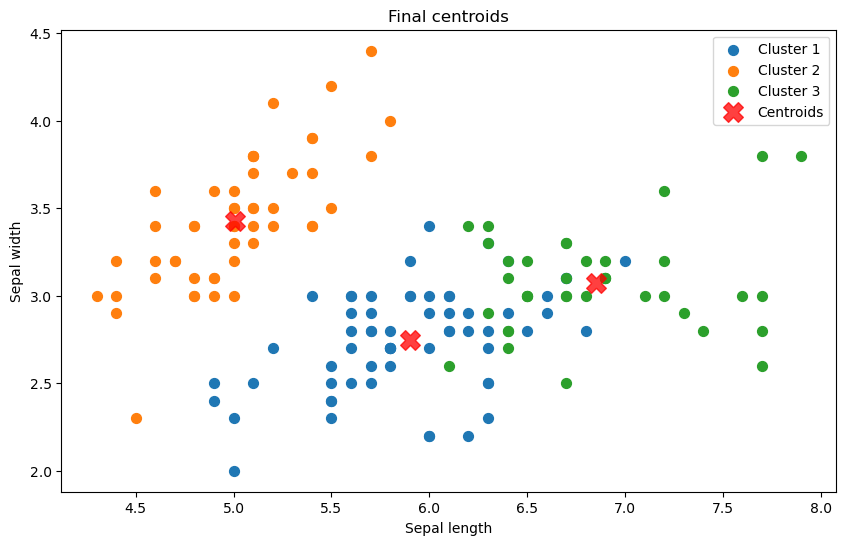

In [15]:
# Plot initial centroids and membership matrix
# print("Iteration 0 Membership Matrix:\n", membership_matrices[0])
plot_clusters(X, np.argmax(membership_matrices[0], axis=1), all_centroids[0], 'Initial centroids')

# Plot centroids and membership matrix at each iteration
for i, (centroids, membership_matrix) in enumerate(zip(all_centroids[1:], membership_matrices), start=1):
    # print(f"Iteration {i} Membership Matrix:\n", membership_matrix)
    plot_clusters(X, np.argmax(membership_matrix, axis=1), centroids, 'Centroids', iteration=i)

# Final centroids and membership matrix
# print(f"Iteration {len(all_centroids)-1} Membership Matrix:\n", membership_matrices[-1])
plot_clusters(X, np.argmax(membership_matrices[-1], axis=1), all_centroids[-1], 'Final centroids')